# Complex Network Analysis on Hospital List of Contacts

**Overview:**
This newtork data analysis on detail list of hospital detail list contacts.
I will be analyzing:
- The centrality (importance of nodes).
- connnection of settle group of nodes
etc.


**Data Description:**
* **ID:** Unique Id for employees at the hospital.
* **Node1:** Primary Node (Node of the contact 1)
* **Node2:** Secondary Node (The node contact 1 links to)
* **Attr1:** Attribute of Node1
* **Attr2:** Attribute of Node2

In [1]:
import networkx as nx

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
FILE= 'data/hospital-detailed-list-of-contacts1/hospital-detailed-list-of-contacts.edges'
tbl= pd.read_csv(FILE, delimiter='\t',  names=['ID', 'Node1', 'Node2', 'Attr1', 'Attr2'])

In [3]:
tbl.head()

,ID,Node1,Node2,Attr1,Attr2
0,140,1157,1232,MED,ADM
1,160,1157,1191,MED,MED
2,500,1157,1159,MED,MED
3,520,1157,1159,MED,MED
4,560,1159,1191,MED,MED


In [7]:
tbl.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 32424 entries, 140 to 347640
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   NODE_1  32424 non-null  int64 
 1   NODE_2  32424 non-null  int64 
 2   ATTR_1  32424 non-null  object
 3   ATTR_2  32424 non-null  object
dtypes: int64(2), object(2)
memory usage: 1.2+ MB


# Exploratory Data Analysis.

In [8]:
for col in tbl.columns:
    print(col, ": ",tbl[col].nunique())

NODE_1 :  65
NODE_2 :  74
ATTR_1 :  4
ATTR_2 :  4


In [9]:
%matplotlib inline
import seaborn as sns

CROSS_TAB = pd.crosstab(tbl['ATTR_1'], tbl['ATTR_2'],normalize=True)

<AxesSubplot:title={'center':'How often they contact'}, xlabel='ATTR_2', ylabel='ATTR_1'>

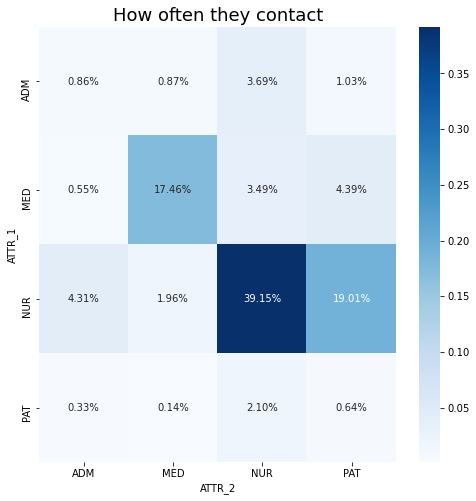

In [10]:
plt.figure(figsize=(8, 8))
plt.title('How often they contact', size=18)
sns.heatmap(data= CROSS_TAB, annot=True, fmt='.2%', cmap='Blues')

Most occuring observations:
* NUR - NUR
* MED - MED
* NUR - PAT

MED (Medical Doctor) <br>
NUR (Nurse)<br>
PAT (Pathogist)

<img src='output/contacts-across-department.png' align='left'>

From the preceding graph, we see that Nurses (NUR-NUR) contact the most, follwed by (NUR_MED)

In [13]:
# reading graph from **.graphml** file
G= nx.read_graphml('data/hospital-detail-list-of-contacts.graphml')

In [14]:
G.nodes(data=True)

NodeDataView({'1157': {'label': '1157', 'size': 16.0, 'r': 143, 'g': 0, 'b': 39, 'x': 448.0066, 'y': 452.94586}, '1232': {'label': '1232', 'size': 16.0, 'r': 143, 'g': 0, 'b': 39, 'x': 360.65967, 'y': -19.118195}, '1191': {'label': '1191', 'size': 16.0, 'r': 143, 'g': 0, 'b': 39, 'x': 391.662, 'y': 401.90295}, '1159': {'label': '1159', 'size': 16.0, 'r': 143, 'g': 0, 'b': 39, 'x': -496.3931, 'y': 32.717957}, '1144': {'label': '1144', 'size': 16.0, 'r': 143, 'g': 0, 'b': 39, 'x': 425.16315, 'y': 19.78949}, '1152': {'label': '1152', 'size': 16.0, 'r': 143, 'g': 0, 'b': 39, 'x': 175.21342, 'y': -107.12262}, '1105': {'label': '1105', 'size': 16.0, 'r': 143, 'g': 0, 'b': 39, 'x': 339.07898, 'y': -478.00522}, '1295': {'label': '1295', 'size': 16.0, 'r': 143, 'g': 0, 'b': 39, 'x': 284.01385, 'y': -177.8797}, '1109': {'label': '1109', 'size': 16.0, 'r': 143, 'g': 0, 'b': 39, 'x': -510.80615, 'y': -320.92706}, '1114': {'label': '1114', 'size': 16.0, 'r': 143, 'g': 0, 'b': 39, 'x': 117.39317, 'y

In [15]:
G.edges(data=True)

OutEdgeDataView([('1157', '1232', {'weight': 1.0, 'id': '129696'}), ('1157', '1191', {'weight': 359.0, 'id': '129697'}), ('1157', '1159', {'weight': 156.0, 'id': '129698'}), ('1157', '1168', {'weight': 16.0, 'id': '130084'}), ('1157', '1193', {'weight': 32.0, 'id': '130270'}), ('1157', '1363', {'weight': 37.0, 'id': '130272'}), ('1157', '1374', {'weight': 3.0, 'id': '130274'}), ('1157', '1179', {'weight': 3.0, 'id': '130665'}), ('1157', '1365', {'weight': 43.0, 'id': '131035'}), ('1157', '1164', {'weight': 49.0, 'id': '132698'}), ('1157', '1320', {'weight': 22.0, 'id': '133736'}), ('1157', '1207', {'weight': 3.0, 'id': '134006'}), ('1157', '1260', {'weight': 272.0, 'id': '134270'}), ('1157', '1383', {'weight': 38.0, 'id': '135430'}), ('1157', '1295', {'weight': 57.0, 'id': '135440'}), ('1157', '1305', {'weight': 2.0, 'id': '135448'}), ('1157', '1209', {'weight': 13.0, 'id': '135697'}), ('1157', '1181', {'weight': 76.0, 'id': '142110'}), ('1157', '1245', {'weight': 28.0, 'id': '142115'}

In [ ]:
# check for aperiodicity
nx.is_aperiodic(G)

## Network Statistics

In [33]:
# statistics

nodes= int(len(G.nodes()))
edges = int(len(G.edges()))
density=nx.density(G)
stats = pd.Series({'Nodes': nodes, 'Edges':edges, 'Density': density})
stats

Nodes        75.000000
Edges      1139.000000
Density       0.205225
dtype: float64

In [39]:
# centrality measures
degree_centrality= pd.Series(nx.degree_centrality(G))
closeness_centrality= pd.Series(nx.closeness_centrality(G))
betweeness_centrality= nx.betweenness_centrality(G)

centralities = pd.DataFrame({'degree_centrality': degree_centrality, 
                          'closeness_centrality': closeness_centrality,
                         'betweeness_centrality': betweeness_centrality})

# the index of this dataframe is the node...
centralities

,degree centrality,closeness_centrality,betweeness_centrality
1157,0.716216,0.165541,0.005375
1232,0.378378,0.241313,0.000868
1191,0.540541,0.248311,0.004369
1159,0.581081,0.178855,0.003683
1144,0.675676,0.122850,0.004061
...,...,...,...
1469,0.202703,0.272523,0.000499
1547,0.189189,0.393061,0.006162
1784,0.148649,0.457449,0.000000
1629,0.405405,0.450094,0.007634


In [40]:
centralities.sort_values(by='degree centrality', ascending=False)

,degree centrality,closeness_centrality,betweeness_centrality
1098,0.824324,0.000000,0.000000
1193,0.783784,0.272523,0.010243
1164,0.770270,0.203498,0.007786
1115,0.770270,0.069498,0.002163
1295,0.756757,0.420463,0.018495
...,...,...,...
1373,0.121622,0.247104,0.000134
1323,0.121622,0.277992,0.000000
1535,0.108108,0.220110,0.000570
1332,0.094595,0.236118,0.000000


### Network Graph Visualization

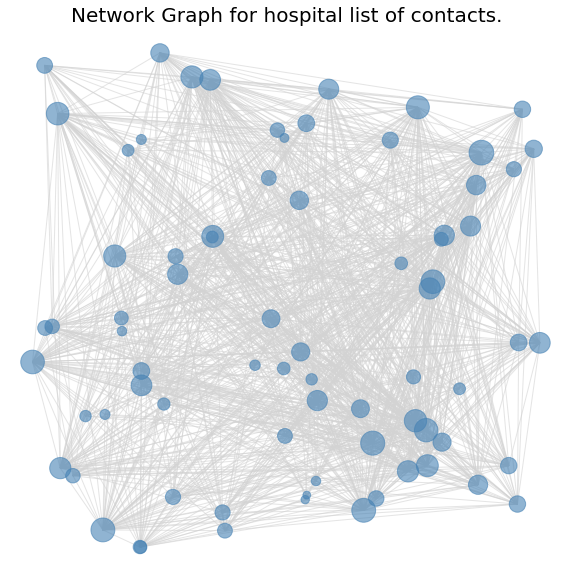

In [78]:
plt.figure(figsize=(10, 10))
plt.title('Network Graph for hospital list of contacts.', size=20)
d = dict(nx.degree(G))

options = {}
nx.draw(
        G, pos=nx.random_layout(G), 
        node_size=[v * 10 for v in d.values()], 
        arrows = False, 
        edge_color='lightgray', 
        node_color= 'steelblue',
        alpha=.60
       )

###  Adding Nodes Attribute

In [207]:
dd_1 = dict()
for i in tbl['NODE_1'].unique().tolist():
    match =  tbl[tbl['NODE_1'].isin([i])]['ATTR_1'].to_list()[0]
    dd_1[str(i)] = match
    
dd_2 = dict()
for i in tbl['NODE_2'].unique().tolist():
    match2 =  tbl[tbl['NODE_2'].isin([i])]['ATTR_2'].to_list()[0]
    dd_2[i] = match2

In [208]:
## adding attribute
nx.set_node_attributes(G, values= dd_1, name='department1')
nx.set_node_attributes(G, values= dd_2, name='department2')
node_data = G.nodes(data=True)

In [211]:
G1 = G.copy()

In [213]:
nx.write_graphml(G1, 'data/saved_graph.graphml')